# Importing Data & Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

from scipy.stats import ttest_rel,ttest_ind,ttest_1samp
from scipy.stats import chi2_contingency, chisquare
from scipy.stats import f_oneway, kruskal, shapiro, levene
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot

!pip install pandas matplotlib

import pandas as pd

In [ ]:
!gdown 1IsH6AiHDyCFzwPq-_3_6c7F0bzcW_5XU

Downloading...
From: https://drive.google.com/uc?id=1IsH6AiHDyCFzwPq-_3_6c7F0bzcW_5XU
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 94.7MB/s]


In [ ]:
df = pd.read_csv('/content/Bank-Records.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df_og = df.copy() # Original dataset

# Checking the Dataset

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
df.shape

(10000, 18)

Dataset has 10000 entries across 18 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Descriptive Statistics

In [ ]:
for col in df.columns:
  print("Unique Values in: ", col)
  print(df[col].unique())
  print("-" * 75)

Unique Values in:  RowNumber
[    1     2     3 ...  9998  9999 10000]
---------------------------------------------------------------------------
Unique Values in:  CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------------------------------------------------------------
Unique Values in:  Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------------------------------------------------------------
Unique Values in:  CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 7

## Basic Statistics

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.describe(include = 'object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


### **Insights**


*   **CreditScore**: Amoung 10000 customers the average credit score is `650.52`, Median score is `652` indicating that there are no outliers. 50% of the customers have score `between 584 and 718`
*   **Age**: Amoung 10000 customers the average age is `39 years`, Median age is `37` indicating that there are no outliers. 50% of the customers have age `between 32 and 44`. It can be inferred that the customer base is `middle aged`.
*   **Balance**: Average bank balance of customers is `76,485 Euros`. Median bank balance is `97,198.54 Euros` indicating that there are few outliers.
*   **NumOfProducts**: Most customers have one product. 50% of the customers have 1 or 2 products. There are some customers who own all 4 products.
*   **EstimatedSalary**: Average estimated salary is `10,0090 euros`. Salary of 50% customers ranges from `51,000 to 1,50,000 euros`.
*   **Points Earned**: Average points earned by using credit card is `606`. 50% of customers have earned point in the range of `410 to 801`. Maximum points earned by a customer is `1000`.

## Distribution Analysis

In [ ]:
hist_cols = ['CreditScore']
box_cols = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']

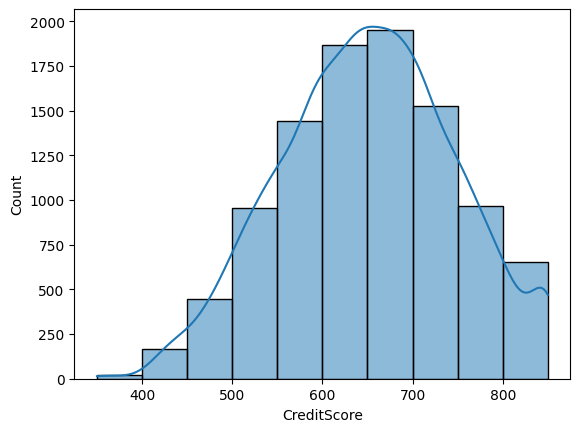

In [ ]:
for col in hist_cols:
  sns.histplot(df[col], kde = True, bins = 10)
  plt.show()

It is seen that Credit score of 10000 customers is normally distributed. Majority of customers have score between 600 and 700.

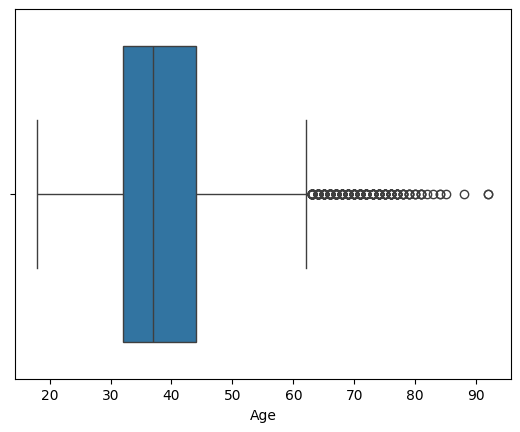

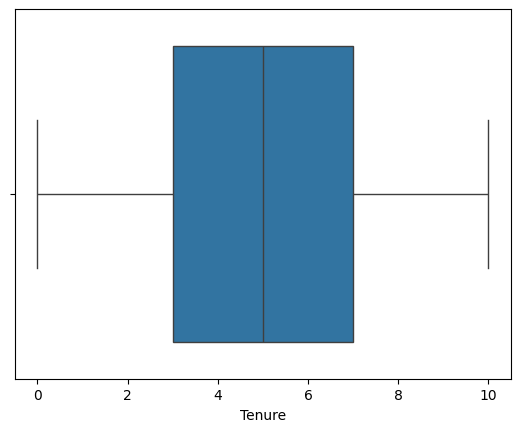

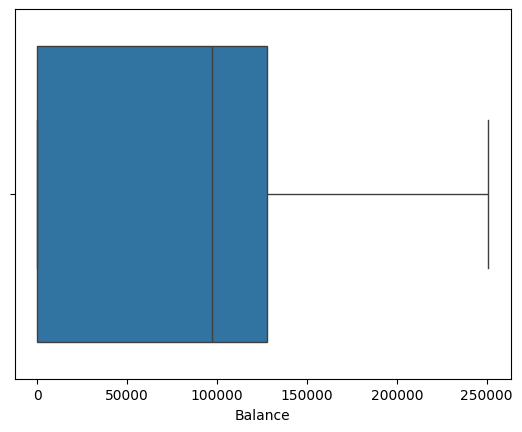

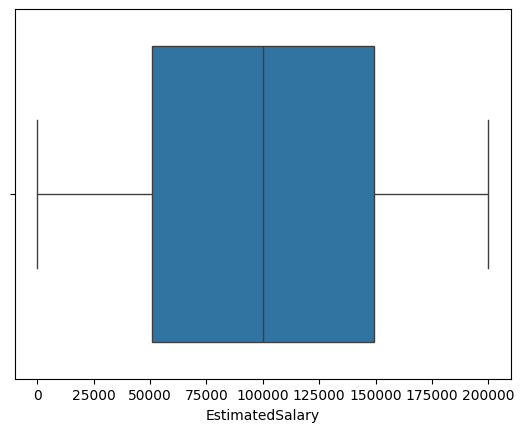

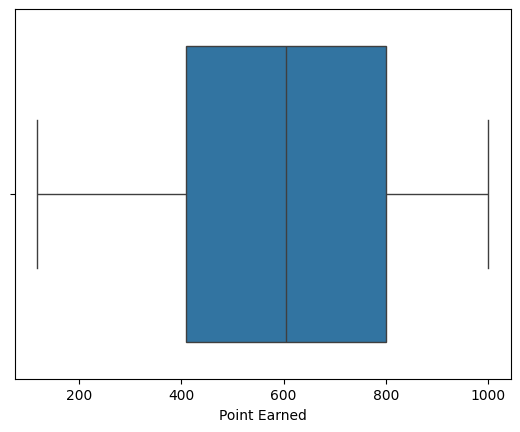

In [ ]:
for col in box_cols:
  sns.boxplot(df[col], orient= 'h')
  plt.show()

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

## Correlation between columns

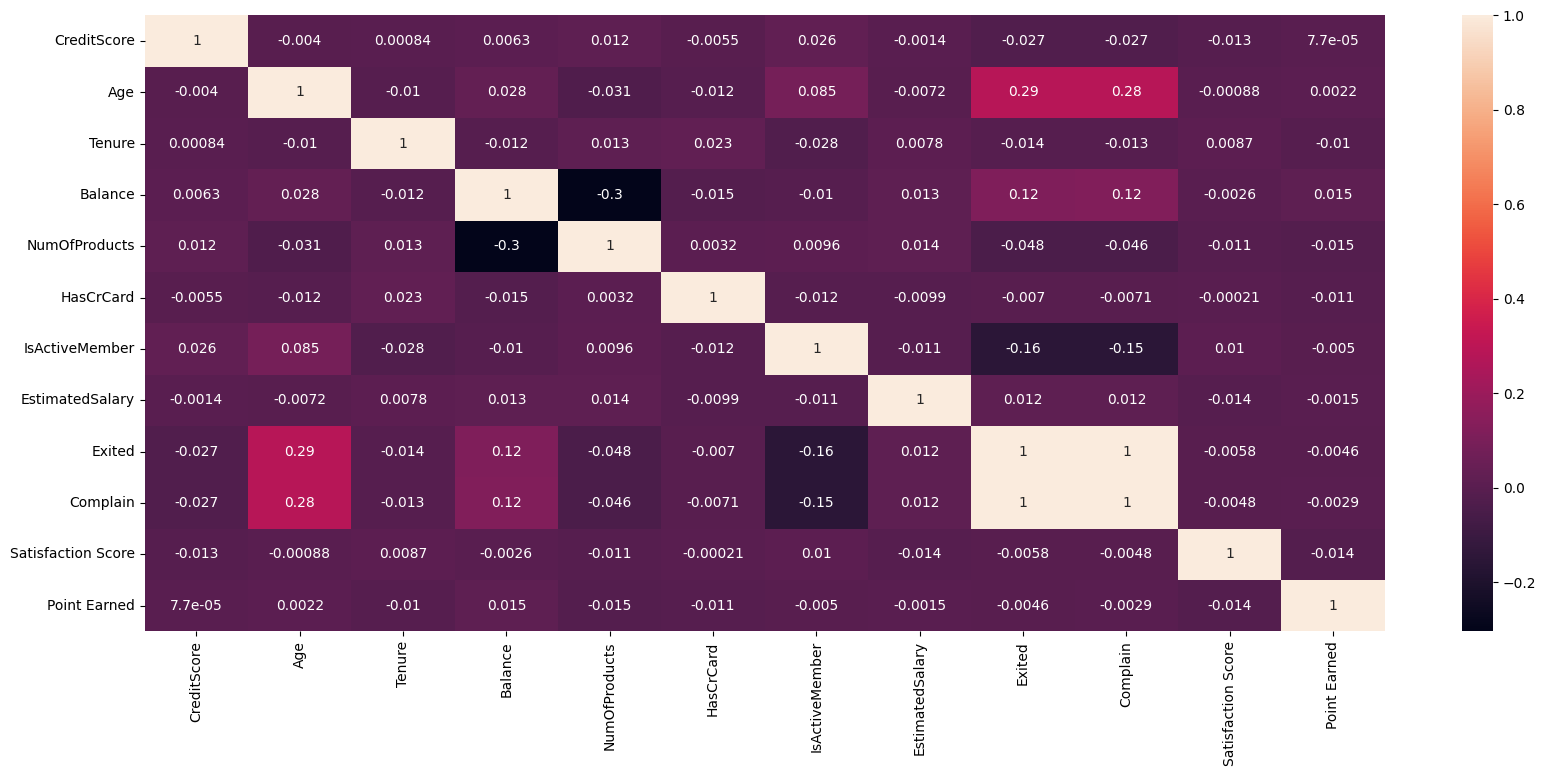

In [ ]:
a = df.corr(numeric_only= True)

plt.figure(figsize=(20,8))
sns.heatmap(data = a, annot = True)

plt.show()

### **Insight**
There is no signficant correlation between numerical features and the Exited variable.

## Customer Profile Analysis

In [ ]:
# Creating Age groups

age_bin = [17,25,35,45,55,65,75,float('inf')]
age_label = ['17-24','25-34','35-44','45-54','55-64','65-74','75+']

df['Age_group'] = pd.cut(df['Age'], bins = age_bin, labels = age_label)

In [ ]:
age_df = df['Age_group'].value_counts()

In [ ]:
gender_df = df['Gender'].value_counts()

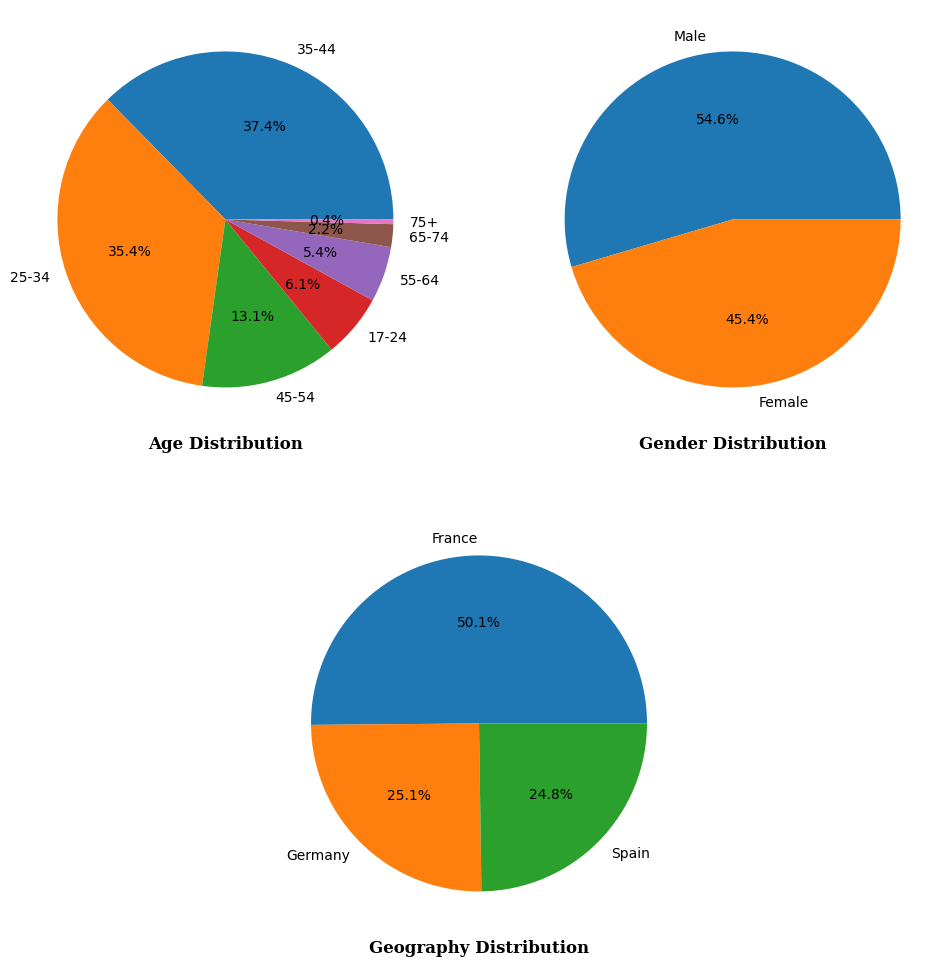

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (12,12))
gs = fig.add_gridspec(2,2)

# Age Distribution

ax0 = fig.add_subplot(gs[0,0])

ax0.pie(age_df.values, labels=age_df.index, autopct='%1.1f%%')

ax0.set_xlabel('Age Distribution',fontfamily='serif',fontsize = 12, fontweight='bold')

# Gender Distribution

ax1 = fig.add_subplot(gs[0,1])

ax1.pie(gender_df.values, labels=gender_df.index, autopct='%1.1f%%')

ax1.set_xlabel('Gender Distribution',fontfamily='serif',fontsize = 12, fontweight='bold')


# Geography Distribution

ax2 = fig.add_subplot(gs[1,:])

geo_df = df['Geography'].value_counts()

ax2.pie(geo_df.values, labels= geo_df.index, autopct='%1.1f%%')

ax2.set_xlabel('Geography Distribution',fontfamily='serif',fontsize = 12, fontweight='bold')

plt.show()

# **Comparative Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

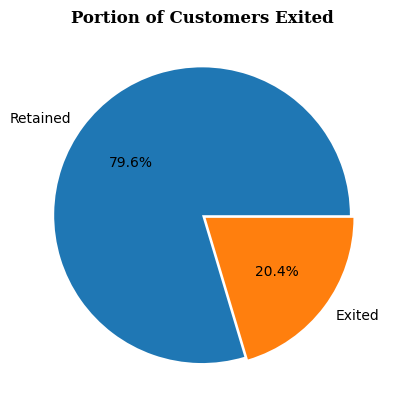

In [ ]:
churn_df = df['Exited'].value_counts()

plt.pie(churn_df.values, labels=['Retained', 'Exited'], autopct='%1.1f%%', explode=(0,0.03))
plt.title('Portion of Customers Exited',fontfamily='serif',fontsize = 12, fontweight='bold')

plt.show

**Insight:**

The churn rate is 20%

## Bivariate Analysis

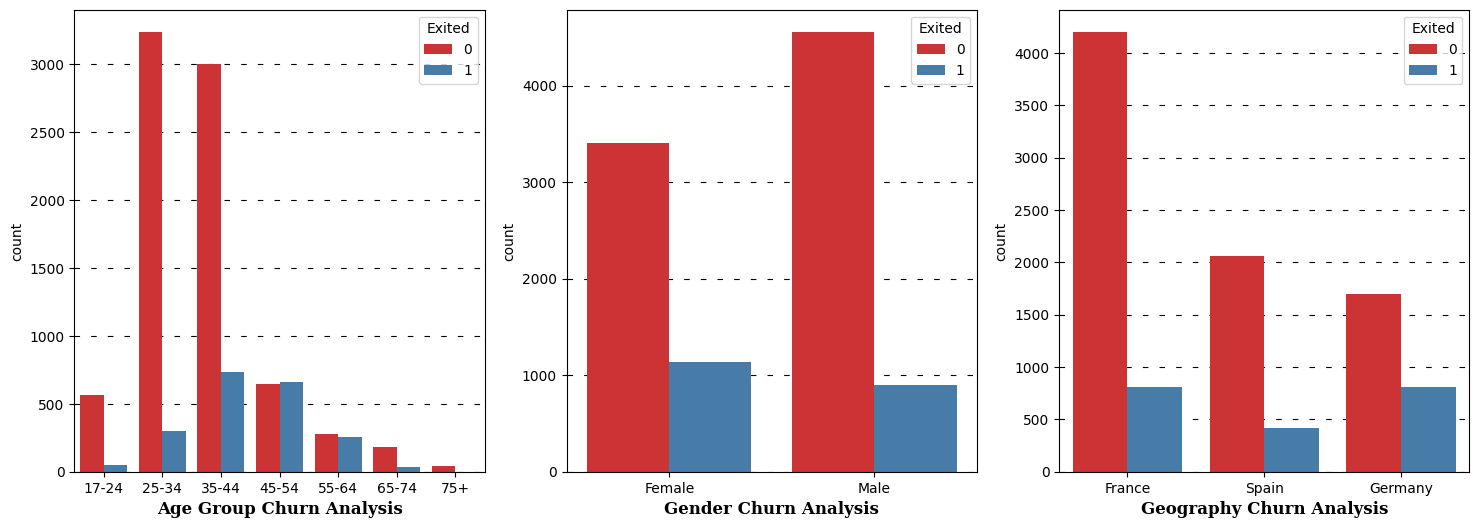

In [ ]:
# Age Gender and Geography

#setting the plot style

fig = plt.figure(figsize = (18,6))
gs = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(gs[0,0])

sns.countplot(x = 'Age_group', hue = 'Exited', data = df, ax = ax0, zorder = 2, palette = 'Set1')
ax0.set_xlabel('Age Group Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax1 = fig.add_subplot(gs[0,1])

sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = ax1, zorder = 2, palette = 'Set1')
ax1.set_xlabel('Gender Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax2 = fig.add_subplot(gs[0,2])

sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = ax2, zorder = 2, palette = 'Set1')
ax2.set_xlabel('Geography Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

plt.show()

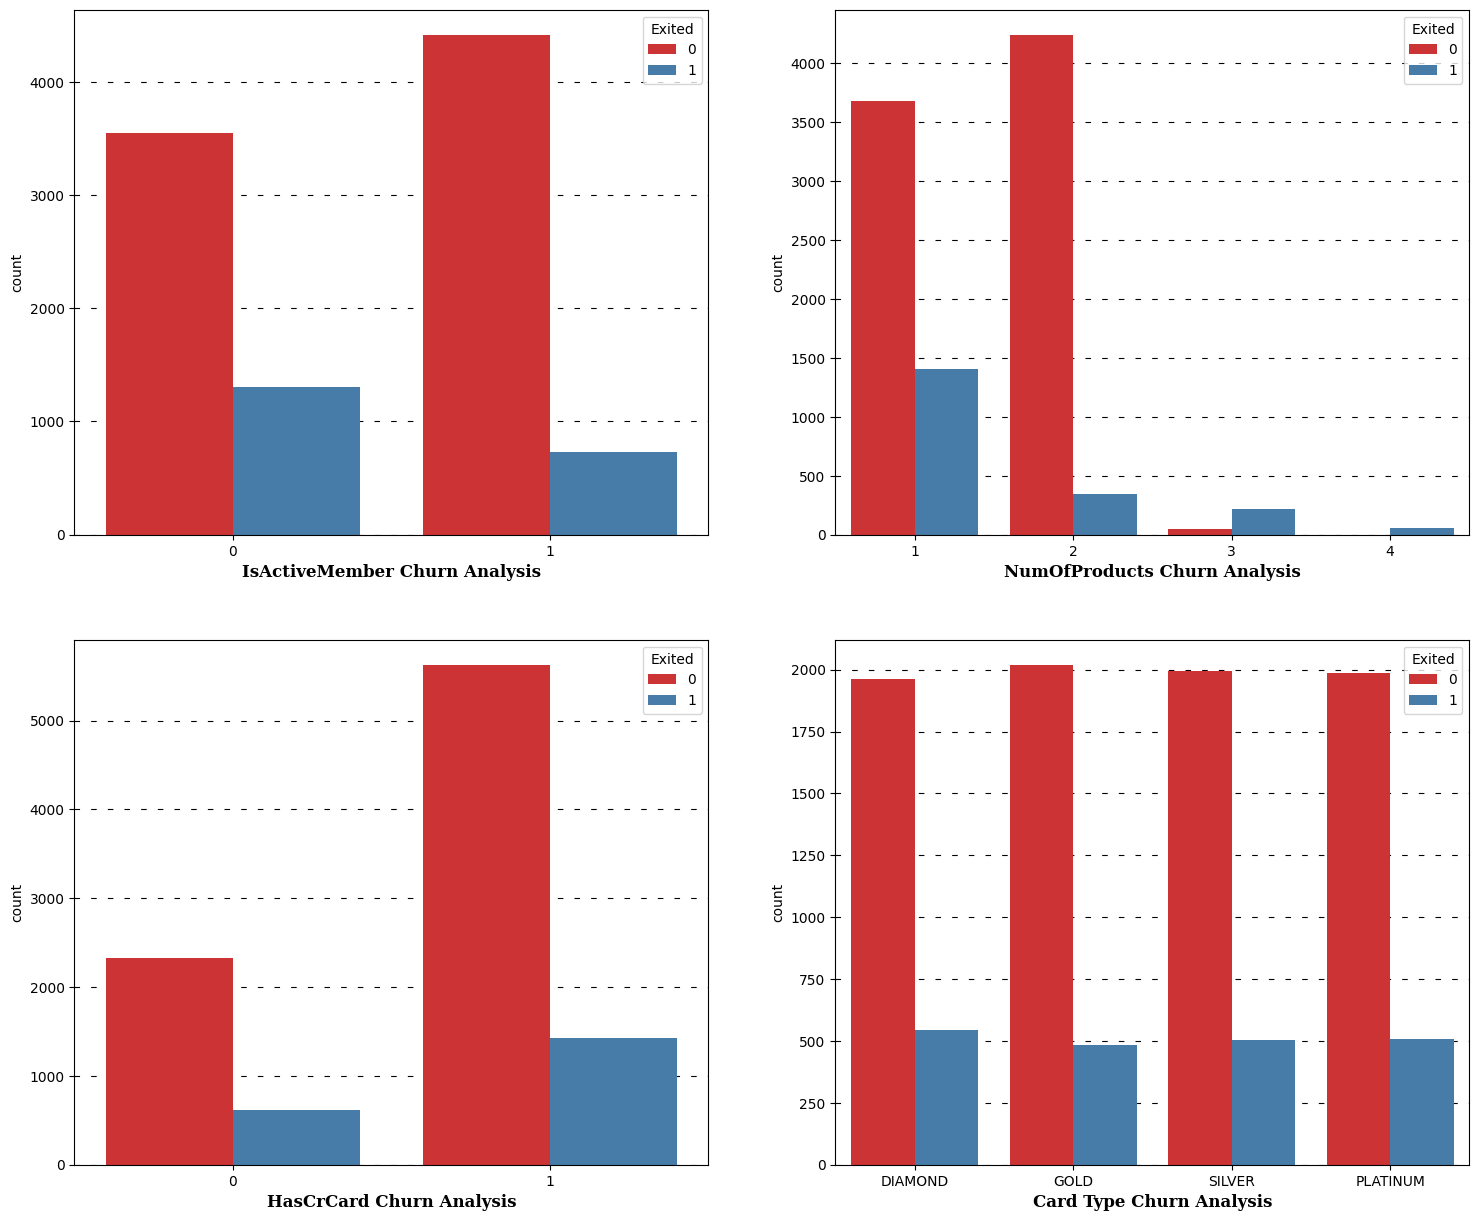

In [ ]:
# IsActiveMember, NumOfProducts, HasCrCard, Card Type

fig = plt.figure(figsize = (18,15))
gs = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(gs[0,0])

sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = ax0, zorder = 2, palette = 'Set1')
ax0.set_xlabel('IsActiveMember Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax1 = fig.add_subplot(gs[0,1])

sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df, ax = ax1, zorder = 2, palette = 'Set1')
ax1.set_xlabel('NumOfProducts Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax2 = fig.add_subplot(gs[1,0])

sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = ax2, zorder = 2, palette = 'Set1')
ax2.set_xlabel('HasCrCard Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax3 = fig.add_subplot(gs[1,1])

sns.countplot(x = 'Card Type', hue = 'Exited', data = df, ax = ax3, zorder = 2, palette = 'Set1')
ax3.set_xlabel('Card Type Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax3.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

plt.show()

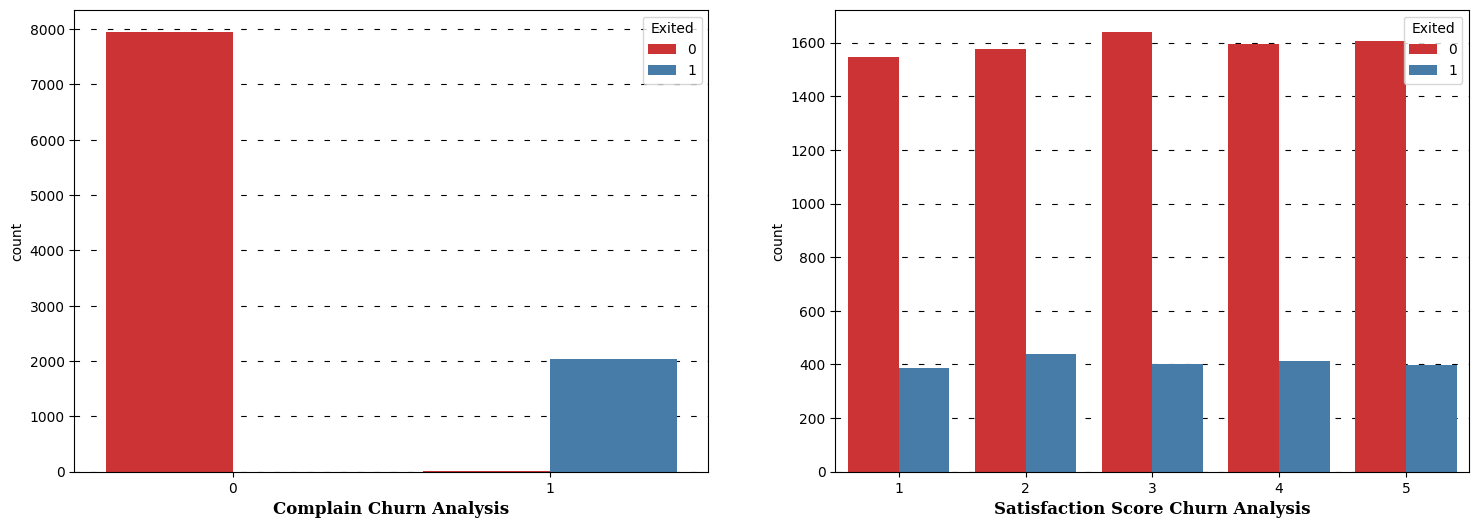

In [ ]:
# Complain, Satisfaction Score

fig = plt.figure(figsize = (18,6))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])

sns.countplot(x = 'Complain', hue = 'Exited', data = df, ax = ax0, zorder = 2, palette = 'Set1')
ax0.set_xlabel('Complain Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

ax1 = fig.add_subplot(gs[0,1])

sns.countplot(x = 'Satisfaction Score', hue = 'Exited', data = df, ax = ax1, zorder = 2, palette = 'Set1')
ax1.set_xlabel('Satisfaction Score Churn Analysis',fontfamily='serif',fontsize = 12, fontweight='bold')
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

plt.show()



<ipython-input-28-5102f35bbdc1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=df, ax = ax0, palette = 'Set1')
<ipython-input-28-5102f35bbdc1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Point Earned', data=df, ax = ax1, palette = 'Set1')
<ipython-input-28-5102f35bbdc1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, ax = ax2, palette = 'Set1')
<ipython-input-28-5102f35bbdc1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

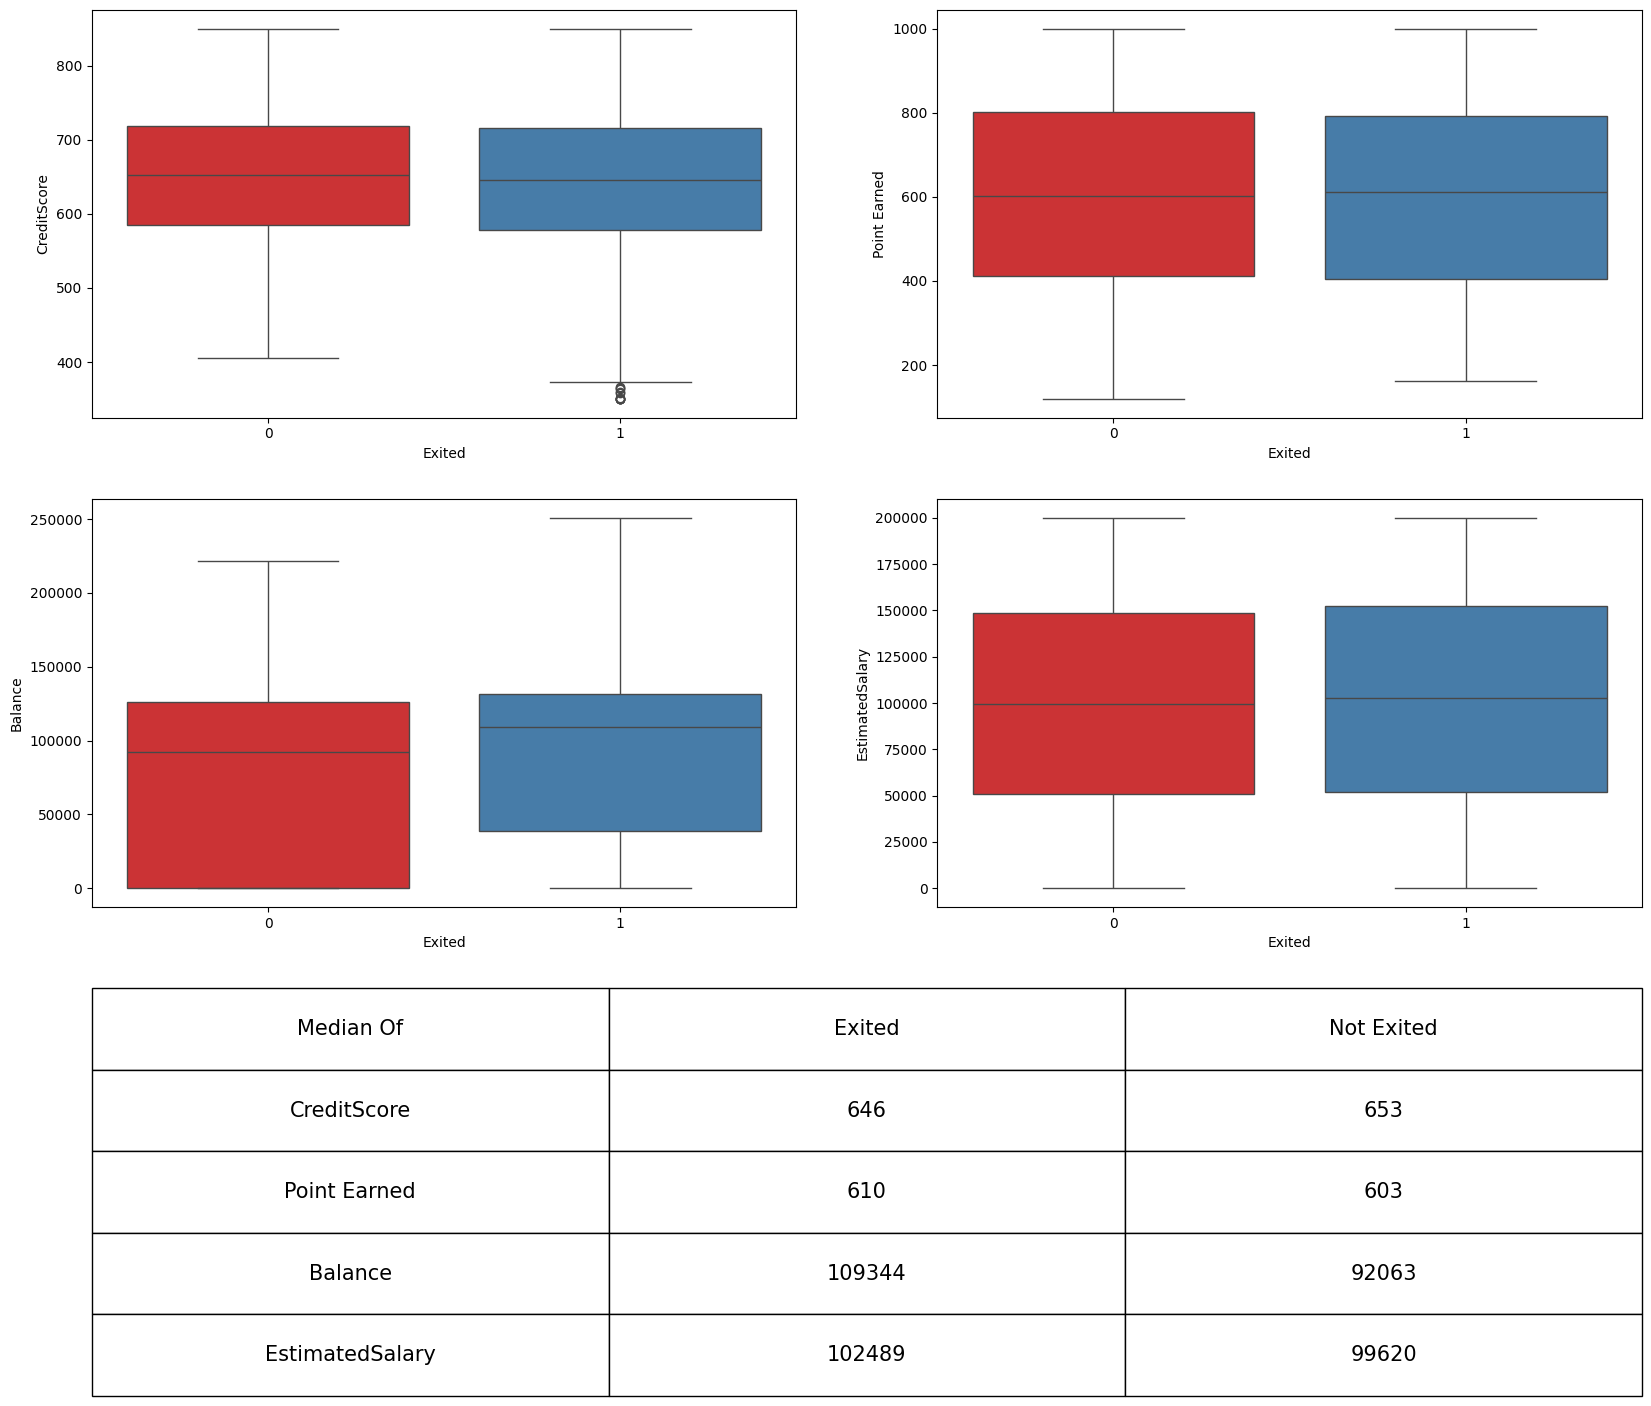

In [ ]:
# CreditScore, Balance, EstimatedSalary, Point Earned

fig = plt.figure(figsize = (20,18))
gs = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(gs[0,0])
sns.boxplot(x='Exited', y='CreditScore', data=df, ax = ax0, palette = 'Set1')

ax1 = fig.add_subplot(gs[0,1])
sns.boxplot(x='Exited', y='Point Earned', data=df, ax = ax1, palette = 'Set1')

ax2 = fig.add_subplot(gs[1,0])
sns.boxplot(x='Exited', y='Balance', data=df, ax = ax2, palette = 'Set1')

ax3 = fig.add_subplot(gs[1,1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax = ax3, palette = 'Set1')

# Table for Median Values

ax4 = fig.add_subplot(gs[2,:])

a_cols = ['CreditScore', 'Point Earned', 'Balance', 'EstimatedSalary']

a_col_values = []

for i in a_cols:
  a = round(df[df['Exited'] == 1][i].median())
  a_col_values.append(a)
  b = round(df[df['Exited'] == 0][i].median())
  a_col_values.append(b)

text = [[a_cols[0], a_col_values[0], a_col_values[1]],
        [a_cols[1], a_col_values[2], a_col_values[3]],
        [a_cols[2], a_col_values[4], a_col_values[5]],
        [a_cols[3], a_col_values[6], a_col_values[7]]]

table = ax4.table(cellText = text, cellLoc='center',colLabels =['Median Of','Exited','Not Exited'],
                  colLoc = 'center', bbox =[0, 0, 1, 1])

table.set_fontsize(15)
ax4.axis('off')


plt.show()

# **Calculating Churn Rate**

In [ ]:
total_cust = len(df)
cust_exited = len(df[df['Exited'] == 1])
cust_not_exited = len(df[df['Exited'] == 0])

churn_rate = round((cust_exited/total_cust)*100,2)

print(f'Total Number of Customers: {total_cust}')
print(f'Number of Customers Exited: {cust_exited}')
print(f'Number of Customers Not Exited: {cust_not_exited}')
print()
print(f'Churn Rate: {churn_rate}%')

Total Number of Customers: 10000
Number of Customers Exited: 2038
Number of Customers Not Exited: 7962

Churn Rate: 20.38%


In [ ]:
# Churn rate by gender

(df.groupby('Gender')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Gender,
Female,25.071539
Male,16.474253


In [ ]:
# Churn rate by Age_group

(df.groupby('Age_group')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Age_group,
45-54,50.572082
55-64,48.320896
35-44,19.646681
65-74,15.525114
25-34,8.498024
17-24,7.528642
75+,2.222222


In [ ]:
# Churn rate by Geography

(df.groupby('Geography')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Geography,
Germany,32.443204
Spain,16.673395
France,16.174711


In [ ]:
# Churn rate by IsActiveMember

(df.groupby('IsActiveMember')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
IsActiveMember,
0,26.871520
1,14.269074


In [ ]:
# Churn rate by NumOfProducts

(df.groupby('NumOfProducts')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
NumOfProducts,
4,100.000000
3,82.706767
1,27.714398
2,7.603486


In [ ]:
# Churn rate by HasCrCard

(df.groupby('HasCrCard')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
HasCrCard,
0,20.814941
1,20.198441


In [ ]:
# Churn rate by Card Type

(df.groupby('Card Type')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Card Type,
DIAMOND,21.779019
PLATINUM,20.360721
SILVER,20.112179
GOLD,19.264588


In [ ]:
# Churn rate by Satisfaction Score

(df.groupby('Satisfaction Score')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Satisfaction Score,
2,21.797418
4,20.617530
1,20.031056
5,19.810379
3,19.637610


In [ ]:
# Churn rate by Complain

(df.groupby('Complain')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Complain,
1,99.510763
0,0.050277


In [ ]:
# Churn rate by Tenure

(df.groupby('Tenure')['Exited'].mean() * 100).sort_values(ascending=False ).to_frame()

,Exited
Tenure,
0,23.002421
1,22.415459
9,21.747967
3,21.110010
5,20.652174
10,20.612245
4,20.525784
6,20.268873
8,19.219512


In [ ]:
# Churn rate of Zero balance account holders

(df[df['Balance'] == 0]['Exited'].value_counts(normalize = True) * 100).sort_values(ascending=False ).to_frame()

,proportion
Exited,
0,86.176389
1,13.823611


## **Multivariate Analysis**

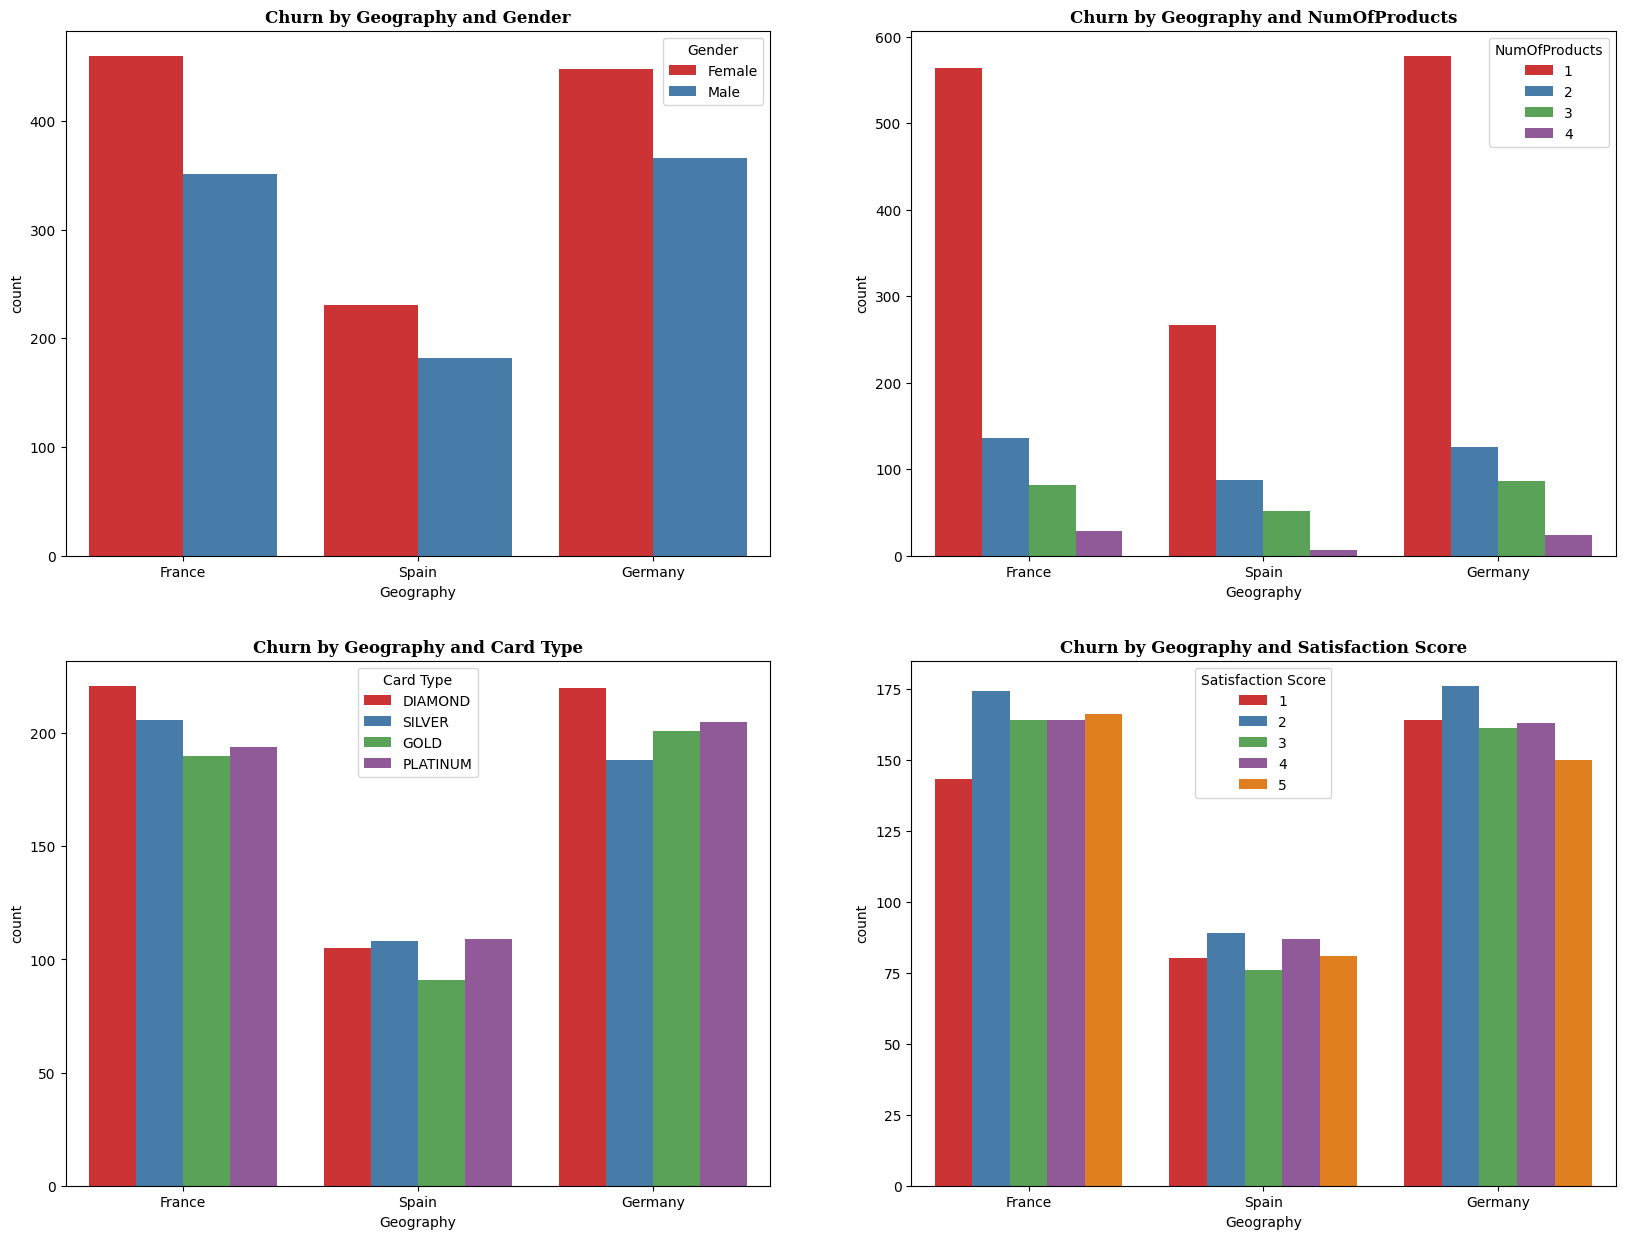

In [ ]:
fig = plt.figure(figsize = (20,15))
gs = fig.add_gridspec(2,2)

# Churn by Geography and Gender
ax0 = fig.add_subplot(gs[0,0])

sns.countplot(x = 'Geography', hue = 'Gender', data = df[df['Exited'] == 1], ax=ax0, palette = 'Set1')
ax0.set_title('Churn by Geography and Gender',fontfamily='serif',fontsize = 12, fontweight='bold')

# Churn by Geography and NumOfProducts
ax1 = fig.add_subplot(gs[0,1])
sns.countplot(x = 'Geography', hue = 'NumOfProducts', data = df[df['Exited'] == 1], ax=ax1, palette = 'Set1')
ax1.set_title('Churn by Geography and NumOfProducts',fontfamily='serif',fontsize = 12, fontweight='bold')

# Churn by Geography and Card Type
ax2 = fig.add_subplot(gs[1,0])
sns.countplot(x = 'Geography', hue = 'Card Type', data = df[df['Exited'] == 1], ax=ax2, palette = 'Set1')
ax2.set_title('Churn by Geography and Card Type',fontfamily='serif',fontsize = 12, fontweight='bold')

# Churn by Geography and Satisfaction Score
ax3 = fig.add_subplot(gs[1,1])
sns.countplot(x = 'Geography', hue = 'Satisfaction Score', data = df[df['Exited'] == 1], ax=ax3, palette = 'Set1')
ax3.set_title('Churn by Geography and Satisfaction Score',fontfamily='serif',fontsize = 12, fontweight='bold')

plt.show()

# **Hypothesis Testing**

- $H_0$: There is no sigificant difference in customers who exited with complaint and those who exited without complaint
- $H_1$: There is a sigificant difference in customers who exited with complaint and those who exited without complaint

In [ ]:
satisfaction_complain_df = pd.crosstab(df[(df['Exited'] == 1)]['Satisfaction Score'], df['Complain'])

chi_stat, p_val, _, _ = chi2_contingency(satisfaction_complain_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('There is a sigificant difference in customers who exited with complaint and those who exited without complaint')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('There is no sigificant difference in customers who exited with complaint and those who exited without complaint')

p_value: 0.525600639219834 > Alpha 0.05
Fail to reject H0
There is no sigificant difference in customers who exited with complaint and those who exited without complaint


- $H_0$: Complain and Exited are independent
- $H_1$: Complain and Exited are dependent

In [ ]:
exited_complain_df = pd.crosstab(df['Exited'], df['Complain'])

chi_stat, p_val, _, _ = chi2_contingency(exited_complain_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('Complain and Exited are dependent')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('Complain and Exited are independent')

p_value: 0.0 <= Alpha 0.05
Reject H0
Complain and Exited are dependent


- $H_0$: Gender and Exited are independent
- $H_1$: Gender and Exited are dependent

In [ ]:
exited_gender_df = pd.crosstab(df['Exited'], df['Gender'])

chi_stat, p_val, _, _ = chi2_contingency(exited_gender_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('Gender and Exited are dependent')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('Gender and Exited are independent')

p_value: 2.9253677618642e-26 <= Alpha 0.05
Reject H0
Gender and Exited are dependent


- $H_0$: Age Group and Exited are independent
- $H_1$: Age Group and Exited are dependent

In [ ]:
age_Exited_df = pd.crosstab(df['Exited'], df['Age_group'])

chi_stat, p_val, _, _ = chi2_contingency(age_Exited_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('Age Group and Exited are dependent')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('Age Group and Exited are independent')

p_value: 1.2151891799464185e-294 <= Alpha 0.05
Reject H0
Age Group and Exited are dependent


- $H_0$: Number of Product and Exited are independent
- $H_1$: Number of Product and Exited are dependent

In [ ]:
products_Exited_df = pd.crosstab(df['Exited'], df['NumOfProducts'])

chi_stat, p_val, _, _ = chi2_contingency(products_Exited_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('Number of Product and Exited are dependent')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('Number of Product and Exited are independent')

p_value: 0.0 <= Alpha 0.05
Reject H0
Number of Product and Exited are dependent


- $H_0$: Has Credit Card and Exited are independent
- $H_1$: Has Credit Card and Exited are dependent

In [ ]:
HasCrCard_Exited_df = pd.crosstab(df['Exited'], df['HasCrCard'])

chi_stat, p_val, _, _ = chi2_contingency(HasCrCard_Exited_df)

alpha = 0.05

if p_val <= alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('HasCrCard and Exited are dependent')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to reject H0')
  print('HasCrCard and Exited are independent')

p_value: 0.5026181509009862 > Alpha 0.05
Fail to reject H0
HasCrCard and Exited are independent


- $H_0$: There is no significant difference between the mean of Points earned of those who exited and those who stayed
- $H_1$: There is significant difference between the mean of Points earned of those who exited and those who stayed

In [ ]:
# Points Eared Vs Exited

exited = df[df['Exited'] == 1]['Point Earned']
stayed = df[df['Exited'] == 0]['Point Earned']

t_stat, p_val = ttest_ind(exited, stayed)
print(t_stat, pvalue)

alpha = 0.05 # 95% confidence

if p_val < alpha:
  print(f'p_value: {p_val} <= Alpha 0.05')
  print('Reject H0')
  print('There is significant difference between the mean of Points earned of those who exited and those who stayed')
else:
  print(f'p_value: {p_val} > Alpha 0.05')
  print('Fail to Reject H0')
  print('There is no significant difference between the mean of Points earned of those who exited and those who stayed')



-0.4627759848070133 0.6435350184288993
p_value: 0.6435350184288993 > Alpha 0.05
Fail to Reject H0
There is no significant difference between the mean of Points earned of those who exited and those who stayed


# **Actionable Insights**

- **High Churn rate in Germany**
  - Campared to France and Spain, Germany has high churn rate of 32.44%. Tailor marketing strategies and product offerings as per the Germans customers.
- **High Churn rate of Female customers**
  - Female customers have a high churn rate of 25%. Design products that appeal to both genders.
- **Age Group Distribution**
  - Age group 45-54 and 54-65 have a churn rate of almost 50%. Develop personalised offer to customers and increase satisfation score to retain the customers.
- **Satisfaction score calculation**
  - Currently the satisfaction score and customer exited are not dependent. Reaccess the parameters and scoring technique to obtain relevent results.
- **Complain Resolution**
  - As per the analysis 100% of the customers who have complained have exited. Improve complain resolution pressess and improve customer satisfation score.
- **Number of products**
  - Churn rate of customers with <= 2 products is lesser than customers with 3 or 4 products. The ideal when a customer has 2 products he/ she should not be pushed for more products.



